#Keywords control with proposed Beam Search
Adapted from Pascual et al. (2020). Code available on https://github.com/dapascual/DirectedBeamSearch

install libraries

In [1]:
!pip install transformers fasttext BERTopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 7.1 MB/s eta 0:00:00
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 61.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.2 MB/s eta 0:00:00
  C

In [2]:
!python -m spacy download de

2023-12-22 11:16:12.140320: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 11:16:12.140373: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 11:16:12.141849: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-22 11:16:12.151413: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-22 11:16:13.472980: W tensorflow/compiler/tf2

In [3]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.de.300.vec.gz

--2023-12-22 11:16:26--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.de.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.165.83.91, 18.165.83.44, 18.165.83.35, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.165.83.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1278030050 (1.2G) [binary/octet-stream]
Saving to: ‘cc.de.300.vec.gz’

cc.de.300.vec.gz    100%[===================>]   1.19G  31.1MB/s    in 41s     

2023-12-22 11:17:07 (29.6 MB/s) - ‘cc.de.300.vec.gz’ saved [1278030050/1278030050]



In [4]:
%%bash
mkdir treetagger
cd treetagger
# Download the tagger package for your system (PC-Linux, Mac OS-X, ARM64, ARMHF, ARM-Android, PPC64le-Linux).
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/tree-tagger-linux-3.2.4.tar.gz
tar -xzvf tree-tagger-linux-3.2.4.tar.gz
# Download the tagging scripts into the same directory.
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/tagger-scripts.tar.gz
gunzip tagger-scripts.tar.gz
# Download the installation script install-tagger.sh.
wget https://cis.lmu.de/~schmid/tools/TreeTagger/data/install-tagger.sh
# Download the parameter files for the languages you want to process.
# list of all files (parameter files) https://cis.lmu.de/~schmid/tools/TreeTagger/#parfiles
wget https://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/data/german.par.gz
sh install-tagger.sh
cd ..
sudo pip install treetaggerwrapper


bin/
bin/train-tree-tagger
bin/separate-punctuation
bin/tree-tagger
bin/tree-tagger-flush
cmd/
cmd/lookup.perl
COPYRIGHT
doc/
doc/sigdat95.pdf
doc/nemlap94.pdf
FILES
README
Release-Notes

German parameter file installed.
Tagging scripts installed.
Path variables modified in tagging scripts.

You might want to add /content/treetagger/cmd and /content/treetagger/bin to the PATH variable so that you do not need to specify the full path to run the tagging scripts.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for treetaggerwrapper: filename=treetaggerwrapper-2.3-py3-none-any.whl size=40760 sha256=4c1a98cfa752ad3c2265e3d847c5f54c94b88deda9d0d8acc84b27decefd162c
  Stored in directory: /root/.cache/pip/wheels/ea/d5/4b/a29ceaa48c687208c69a791394c02c8e432971a98d8e5fc9ca
Successfully built treetaggerwrapper


--2023-12-22 11:17:08--  https://cis.lmu.de/~schmid/tools/TreeTagger/data/tree-tagger-linux-3.2.4.tar.gz
Resolving cis.lmu.de (cis.lmu.de)... 129.187.148.72, 2001:4ca0:4f01::5
Connecting to cis.lmu.de (cis.lmu.de)|129.187.148.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1889240 (1.8M) [application/x-gzip]
Saving to: ‘tree-tagger-linux-3.2.4.tar.gz’

     0K .......... .......... .......... .......... ..........  2%  234K 8s
    50K .......... .......... .......... .......... ..........  5%  469K 6s
   100K .......... .......... .......... .......... ..........  8% 38.2M 4s
   150K .......... .......... .......... .......... .......... 10% 5.22M 3s
   200K .......... .......... .......... .......... .......... 13%  514K 3s
   250K .......... .......... .......... .......... .......... 16% 35.7M 2s
   300K .......... .......... .......... .......... .......... 18% 6.70M 2s
   350K .......... .......... .......... .......... .......... 21% 28.7M 2s
   400K 

In [20]:
import csv
import math
import random
import torch
import time
import os
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import transformers
from transformers import AutoTokenizer, pipeline,AutoModelWithLMHead
from google.colab import drive
import fasttext
from nltk.stem import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
import torch.nn.functional as F
from huggingface_hub import hf_hub_download
import treetaggerwrapper
import pandas as pd
import spacy
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,accuracy_score, recall_score, precision_score,f1_score
import matplotlib.pyplot as plt
from bertopic import BERTopic
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re
tagger = treetaggerwrapper.TreeTagger(TAGLANG='de',TAGDIR='treetagger/')
drive.mount('/content/drive')

nltk.download('stopwords')
nltk.download('punkt')
german_stop_words = set(stopwords.words('german'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##Prepare functions
### convert sentiment

In [6]:
def convert_sentiment(text):
  if text in["[negative]","NEGATIVE"]:
    return 0
  if text in ["[positive]","POSITIVE"]:
    return 1

def convert_to_sentiment(x):
  if x == 0:
    return "[negative]"
  if x==1:
    return "[positive]"

def del_stop_words(text):
  words = nltk.word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in german_stop_words]
  return' '.join(filtered_words)

In [11]:
def top_p_filtering(logits, top_p=0.0, filter_value=-float('Inf')):

    if top_p > 0.0:
        sorted_logits, sorted_indices = torch.sort(logits, descending=True)
        cumulative_probs = torch.cumsum(F.softmax(sorted_logits, dim=-1), dim=-1)

        # Remove tokens with cumulative probability above the threshold
        sorted_indices_to_remove = cumulative_probs > top_p
        # Shift the indices to the right to keep also the first token above the threshold
        sorted_indices_to_remove[..., 1:] = sorted_indices_to_remove[..., :-1].clone()
        sorted_indices_to_remove[..., 0] = 0

        #indices_to_remove = torch.zeros_like(logits, dtype=torch.uint8).scatter_(dim=-1, index=sorted_indices, src=sorted_indices_to_remove )

        indices_to_remove = sorted_indices[sorted_indices_to_remove]
        logits[indices_to_remove] = filter_value

    return logits


In [12]:
def top_k_filtering(logits, top_k=0,  filter_value=-float('Inf')):

    top_k = min(top_k, logits.size(-1))  # Safety check
    if top_k > 0:
        # Remove all tokens with a probability less than the last token of the top-k
        indices_to_remove = logits < torch.topk(logits, top_k)[0][..., -1, None]
        logits[indices_to_remove] = filter_value

    return logits

In [13]:
def top_k_top_p_filtering(logits, top_k=0, top_p=0.0, filter_value=-float('Inf')):
    """ Filter a distribution of logits using top-k and/or nucleus (top-p) filtering
        Args:
            logits: logits distribution shape (vocabulary size)
            top_k >0: keep only top k tokens with highest probability (top-k filtering).
            top_p >0.0: keep the top tokens with cumulative probability >= top_p (nucleus filtering).
                Nucleus filtering is described in Holtzman et al. (http://arxiv.org/abs/1904.09751)
    """
    assert logits.dim() == 1  # batch size 1 for now - could be updated for more but the code would be less clear
    top_k = min(top_k, logits.size(-1))  # Safety check
    if top_k > 0:
        # Remove all tokens with a probability less than the last token of the top-k
        indices_to_remove = logits < torch.topk(logits, top_k)[0][..., -1, None]
        logits[indices_to_remove] = filter_value

    if top_p > 0.0:
        sorted_logits, sorted_indices = torch.sort(logits, descending=True)
        cumulative_probs = torch.cumsum(F.softmax(sorted_logits, dim=-1), dim=-1)

        # Remove tokens with cumulative probability above the threshold
        sorted_indices_to_remove = cumulative_probs > top_p
        # Shift the indices to the right to keep also the first token above the threshold
        sorted_indices_to_remove[..., 1:] = sorted_indices_to_remove[..., :-1].clone()
        sorted_indices_to_remove[..., 0] = 0

        #indices_to_remove = torch.zeros_like(logits, dtype=torch.uint8).scatter_(dim=-1, index=sorted_indices, src=sorted_indices_to_remove )

        indices_to_remove = sorted_indices[sorted_indices_to_remove]
        logits[indices_to_remove] = filter_value

    return logits


In [14]:
def noguide(text, tokenizer, model, top_k=0, top_p=0.9, temperature=1.):
    """ Samples the next word of the sequence without logit modification (guidance
    """
    ## GPT2 - generate logits
    indexed_tokens = tokenizer.encode(text)
    tokens_tensor = torch.tensor([indexed_tokens])
    tokens_tensor = tokens_tensor.to('cuda')


    # Predict all tokens
    outputs = model(tokens_tensor)
    del tokens_tensor
    torch.cuda.empty_cache()
    logits = outputs.logits
    logits = logits[0, -1, :]/ temperature
    logits = top_p_filtering(logits,  top_p=top_p)
    logits = F.softmax(logits, dim=-1)
    predicted_index = torch.multinomial(logits, 1).item()

    predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])

    pred_word = predicted_text.split()[-1]

    return predicted_text

In [15]:

def guidance(text, tokenizer, model, guide_word_stem, fasttext_words, conv_table_gpt_vocab, weight, guide=False, prev_proba=1, top_k=None, top_p=None, temperature=1., only_max=False):

    indexed_tokens = tokenizer.encode(text)
    tokens_tensor = torch.tensor([indexed_tokens])
    tokens_tensor = tokens_tensor.to('cuda')
    outputs = model(tokens_tensor)
    del tokens_tensor
    torch.cuda.empty_cache()
    logits = outputs.logits

    logits = logits[0, -1, :]/ temperature

    proba = F.softmax(logits, dim=-1)



    # Calculate cosine similarity
    logits_pro_guid_word=[]
    pred_indexes=[]
    for k,fasttext_word in zip(guide_word_stem,fasttext_words):
      sim = cosine_similarity(np.reshape(
              fasttext_word, (1, -1)), conv_table_gpt_vocab)


      sim = np.clip(np.squeeze(sim), a_min=0, a_max=None)
      sim_squared = sim*sim     ###

      logits_temp = logits + torch.tensor(sim_squared*weight).cuda()

      logits_temp = top_p_filtering(logits_temp,  top_p=top_p)

      logits_temp = F.softmax(logits_temp, dim=-1)

      predicted_index = torch.multinomial(logits_temp, 1).item() #sample from multinomial distribution

      logits_pro_guid_word.append(logits[predicted_index].item())

      pred_indexes.append(predicted_index)
    #select biggest probability token
    predicted_index=pred_indexes[np.argmax(logits_pro_guid_word)]
    predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])

    pred_word = predicted_text.split()[-1]


    pred_word_stem=  tagger.tag_text(pred_word,tagonly=True)
    pred_word_stem=[keyword.split('\t')[-1] for keyword in pred_word_stem][0]

    return predicted_text, pred_word_stem

### Load FastText and models

In [7]:
model_path = hf_hub_download(repo_id="facebook/fasttext-de-vectors", filename="model.bin")
model_fasttext = fasttext.load_model(model_path)


model.bin:   0%|          | 0.00/7.24G [00:00<?, ?B/s]

In [8]:
tokenizer_gpt = AutoTokenizer.from_pretrained("/content/drive/MyDrive/Masterthesis/Models/german_gpt2_sft_2_epoch_rl_2epochs")
model_gpt = AutoModelWithLMHead.from_pretrained("/content/drive/MyDrive/Masterthesis/Models/german_gpt2_sft_2_epoch_rl_2epochs")
#tokenizer_gpt = AutoTokenizer.from_pretrained("benjamin/gpt2-wechsel-german")
#model_gpt = AutoModelWithLMHead.from_pretrained("benjamin/gpt2-wechsel-german")
model_gpt.to('cuda')

Some weights of the model checkpoint at /content/drive/MyDrive/Masterthesis/Models/german_gpt2_sft_2_epoch_rl_2epochs were not used when initializing GPT2LMHeadModel: ['v_head.summary.weight', 'v_head.summary.bias']
- This IS expected if you are initializing GPT2LMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2LMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

### Load FastText and models

In [9]:
vocab_size=len(tokenizer_gpt)
vocab_size

50257

In [10]:
conv_table_gpt_vocab = np.zeros((vocab_size, 300))
for i in range(vocab_size):
        try:
            word = tokenizer_gpt.decode([i])
            word = word.strip().lower()
            fasttext = model_fasttext.get_word_vector(word)
            conv_table_gpt_vocab[i, :] = fasttext
        except:
            word = tokenizer_gpt.decode([i])
            conv_table_gpt_vocab[i, :] = np.zeros((300))

In [16]:
word_set_index=0
seed=None
nsamples=1
batch_size=1
length=None
temperature=0.9
top_k=0
top_p=0.5
models_dir='models'
constant=20
save_path='dummy.txt'
sample=False
temp=1
#only_max = False
weight=30
guide_next = True


In [17]:
tokenizer_for_perplex = AutoTokenizer.from_pretrained("distilbert-base-german-cased")
model_for_perplex = AutoModelWithLMHead.from_pretrained("distilbert-base-german-cased")
model_for_perplex.to("cuda")

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/240k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/479k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/270M [00:00<?, ?B/s]

DistilBertForMaskedLM(
  (activation): GELUActivation()
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(31102, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.

## Generetes text based on keyowrds list

In [18]:
df_keywords=pd.read_csv("/content/drive/MyDrive/Masterthesis/Data/keywords_list.tsv")

###Beam Searh mechanism

In [ ]:
tagger = treetaggerwrapper.TreeTagger(TAGLANG='de',TAGDIR='treetagger/')
df_beam=pd.DataFrame(columns=["sentiment","text","perplexity", "keywords", "num_keywords", "num_keywords_not_used"])
width_beam=3
flag_next_gen=True

guide_next == True
for j in range(0,50):

  context_next_gen=[]
  context=  [df_keywords.loc[j,"sent" ]+ " Wir waren in diesem Hotel."]#[random.sample(sentiment,1)[0]]
  keywords=eval(df_keywords.loc[j,"keywords" ])#random.sample(words,3)
  keywords = tagger.tag_text(keywords,tagonly=True)
  keywords=[keyword.split('\t')[-1] for keyword in keywords]
  keywords_fasttext=[model_fasttext.get_word_vector(keyword) for keyword in keywords]

  guide_word_lemma= tagger.tag_text(keywords,tagonly=True)
  guide_word_lemma=[keyword.split('\t')[-1] for keyword in guide_word_lemma]
  guide_word_lemma_cp=keywords.copy()
 # print(j,context)

  for i in range(30):
    count_iteration = 0
    flag_next_gen=True
    while(flag_next_gen):
      while(any(context)):
        for i in range(width_beam):

          if guide_next == True:
                  tmp_new_context, pred_stem = guidance(context[0], tokenizer_gpt, model_gpt,
                                        guide_word_lemma,keywords_fasttext, conv_table_gpt_vocab, weight, guide_next,top_p=0.5)
                  context_next_gen.append(tmp_new_context)

          else:
            tmp_new_context= noguide(context[0], tokenizer_gpt, model_gpt)
            context_next_gen.append(tmp_new_context)
        context.pop(0)

      context = context_next_gen
      context_next_gen = []
      count_iteration +=1

      if count_iteration == 4:
        flag_next_gen = False

    cleaned_list = [item.split('] ')[1] for item in context]
    keywords_weigth = [len(set([word.split('\t')[-1] for word in tagger.tag_text(word_tokenize(text, language='german'),tagonly=True)]).intersection(set(keywords))) for text in cleaned_list]

    tmp_dict=dict()

    for text,no_keywords in zip(context,keywords_weigth):
      tokenize_input = tokenizer_gpt.tokenize(text)
      tensor_input = torch.tensor([tokenizer_gpt.convert_tokens_to_ids(tokenize_input)]).to('cuda')

      loss, _ = model_gpt(tensor_input, labels=tensor_input)[:2]
      perplexity=math.exp(loss)
      perplexity_weigted=math.exp(loss)/(no_keywords+1)
      tmp_dict[text]=perplexity_weigted

    sorted_dict=dict(sorted(tmp_dict.items(), key=lambda item: item[1]))
    best_entry = list(sorted_dict.items())[0]
    context=best_entry[0]
    result = re.sub(r'\[(positive|negative)\]', '', context)
    sentence = tagger.tag_text(word_tokenize(result),tagonly=True)
    sentence=[word.split('\t')[-1] for word in sentence]

    keywords=[item for item in keywords if item not in sentence]
    keywords_fasttext=[model_fasttext.get_word_vector(keyword) for keyword in keywords]
    context=[context]
    if len(keywords)==0:
      guide_next=False


  generated_text=re.sub('\[.*?\]', '', context[0])
  tokenize_input = tokenizer_for_perplex.tokenize(generated_text)
  tensor_input = torch.tensor([tokenizer_for_perplex.convert_tokens_to_ids(tokenize_input)])
  tensor_input = tensor_input.to("cuda")
 # print(tensor_input.device)
  loss, logits = model_for_perplex(tensor_input, labels=tensor_input)[:2]
  new_row = {
        "sentiment": df_keywords.loc[j, "sent"],
        "text": generated_text,
        "perplexity": math.exp(loss),
        "keywords": guide_word_lemma_cp,
        "num_keywords": len(guide_word_lemma_cp),
        "num_keywords_not_used": len(keywords)
    }
  df_beam = df_beam.append(new_row, ignore_index=True)
  #print(generated_text, guide_word_lemma_cp,keywords, math.exp(loss))

In [ ]:
df_beam.to_csv('/content/drive/MyDrive/Masterthesis/Results/beam22.tsv', sep="\t")
#df_beam.to_csv('/content/drive/MyDrive/Masterthesis/Results/beam_gpt.tsv', sep="\t")

##SFT1RL1

In [ ]:
df_beam11=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/beam11.tsv', sep="\t")

In [ ]:
df_beam11.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.060487
[positive]    1.051552
Name: perplexity, dtype: float64

In [ ]:
df_beam11["perplexity"].mean()

1.0567339982680566

In [ ]:
df_beam11["num_keywords_used"]=df_beam11["num_keywords"]-df_beam11["num_keywords_not_used"]


In [ ]:
df_beam11.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.056107
1    1.056633
2    1.058699
3    1.055886
Name: perplexity, dtype: float64

In [ ]:
df_beam11["succses_rate"]=df_beam11["num_keywords_used"]/df_beam11["num_keywords"]
np.mean(df_beam11["succses_rate"])

0.2866666666666666

In [ ]:
df_beam11["gen_text"]=df_beam11["text"].apply(lambda x: re.sub(r'\[.*?\]', '', x))

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_beam11["sent_predicted_label"]=df_beam11["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_beam11["sentiment_conv"]=df_beam11["sentiment"].apply(lambda x :convert_sentiment(x))
df_beam11["sent_predicted_label_conv"]=df_beam11["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

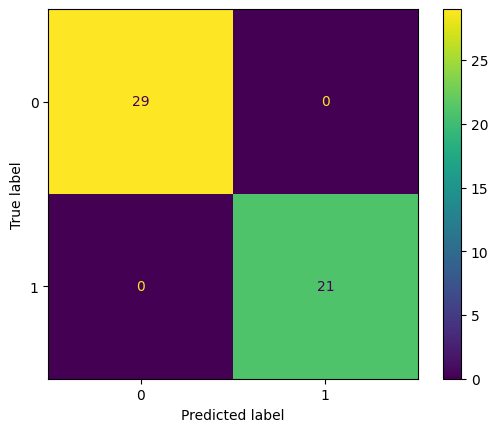

Accuracy: 1.0
Recall: [1. 1.]
Precision: [1. 1.]
F1: [1. 1.]


In [ ]:
y_test=df_beam11["sentiment_conv"]
predicted=df_beam11["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

##SFT1RL2

In [ ]:
df_beam12=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/beam12.tsv', sep="\t")

In [ ]:
df_beam12.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.061088
[positive]    1.048308
Name: perplexity, dtype: float64

In [ ]:
df_beam12["perplexity"].mean()

1.055720345063734

In [ ]:
df_beam12["num_keywords_used"]=df_beam11["num_keywords"]-df_beam11["num_keywords_not_used"]


In [ ]:
df_beam12.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.056453
1    1.054642
2    1.056029
3    1.058841
Name: perplexity, dtype: float64

In [ ]:
df_beam12["succses_rate"]=df_beam11["num_keywords_used"]/df_beam12["num_keywords"]
np.mean(df_beam12["succses_rate"])

0.2866666666666666

In [ ]:
df_beam12["gen_text"]=df_beam12["text"].apply(lambda x: re.sub(r'\[.*?\]', '', x))

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_beam12["sent_predicted_label"]=df_beam12["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_beam12["sentiment_conv"]=df_beam12["sentiment"].apply(lambda x :convert_sentiment(x))
df_beam12["sent_predicted_label_conv"]=df_beam12["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

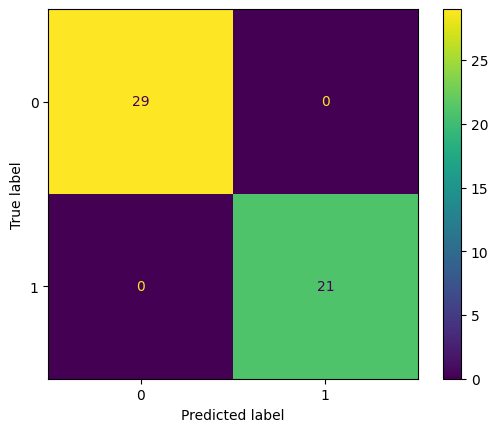

Accuracy: 1.0
Recall: [1. 1.]
Precision: [1. 1.]
F1: [1. 1.]


In [ ]:
y_test=df_beam12["sentiment_conv"]
predicted=df_beam12["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

##SFT2RL1

In [ ]:
df_beam21=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/beam21.tsv', sep="\t")

In [ ]:
df_beam21.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.057137
[positive]    1.059658
Name: perplexity, dtype: float64

In [ ]:
df_beam21["perplexity"].mean()

1.058195991520225

In [ ]:
df_beam21["num_keywords_used"]=df_beam21["num_keywords"]-df_beam21["num_keywords_not_used"]


In [ ]:
df_beam21.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.059701
1    1.054433
2    1.064130
3    1.060490
Name: perplexity, dtype: float64

In [ ]:
df_beam21["succses_rate"]=df_beam21["num_keywords_used"]/df_beam21["num_keywords"]
np.mean(df_beam21["succses_rate"])

0.2866666666666666

In [ ]:
df_beam21["gen_text"]=df_beam21["text"].apply(lambda x: re.sub(r'\[.*?\]', '', x))

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_beam21["sent_predicted_label"]=df_beam21["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_beam21["sentiment_conv"]=df_beam21["sentiment"].apply(lambda x :convert_sentiment(x))
df_beam21["sent_predicted_label_conv"]=df_beam21["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

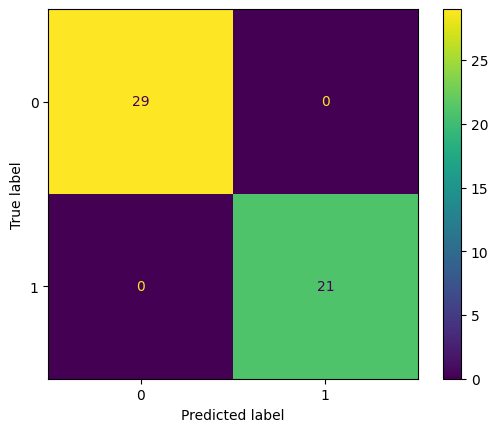

Accuracy: 1.0
Recall: [1. 1.]
Precision: [1. 1.]
F1: [1. 1.]


In [ ]:
y_test=df_beam21["sentiment_conv"]
predicted=df_beam21["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

##SFT2RL2

In [ ]:
df_beam22=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/beam22.tsv', sep="\t")

In [ ]:
df_beam22.groupby("sentiment").mean()["perplexity"]

sentiment
[negative]    1.050987
[positive]    1.048567
Name: perplexity, dtype: float64

In [ ]:
df_beam22["perplexity"].mean()

1.049970577750416

In [ ]:
df_beam22["num_keywords_used"]=df_beam22["num_keywords"]-df_beam22["num_keywords_not_used"]


In [ ]:
df_beam22.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.049405
1    1.051963
2    1.043297
Name: perplexity, dtype: float64

In [ ]:
df_beam22["succses_rate"]=df_beam22["num_keywords_used"]/df_beam22["num_keywords"]
np.mean(df_beam21["succses_rate"])

0.2866666666666666

In [ ]:
df_beam22["gen_text"]=df_beam22["text"].apply(lambda x: re.sub(r'\[.*?\]', '', x))

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_beam22["sent_predicted_label"]=df_beam22["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_beam22["sentiment_conv"]=df_beam22["sentiment"].apply(lambda x :convert_sentiment(x))
df_beam22["sent_predicted_label_conv"]=df_beam22["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

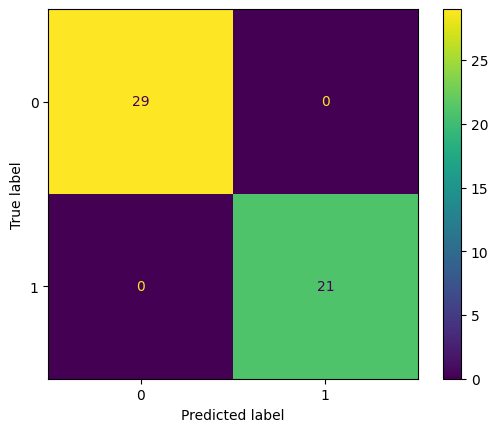

Accuracy: 1.0
Recall: [1. 1.]
Precision: [1. 1.]
F1: [1. 1.]


In [ ]:
y_test=df_beam22["sentiment_conv"]
predicted=df_beam22["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

##GPT

In [ ]:
df_beam_gpt=pd.read_csv('/content/drive/MyDrive/Masterthesis/Results/beam_gpt.tsv', sep="\t")

In [ ]:
df_beam_gpt.groupby("sentiment").mean()["perplexity"]

In [ ]:
df_beam_gpt["perplexity"].mean()

1.0542035986027876

In [ ]:
df_beam_gpt["num_keywords_used"]=df_beam_gpt["num_keywords"]-df_beam_gpt["num_keywords_not_used"]


In [ ]:
df_beam_gpt.groupby("num_keywords_used").mean()["perplexity"]

num_keywords_used
0    1.051390
1    1.054506
2    1.056790
3    1.056612
Name: perplexity, dtype: float64

In [ ]:
df_beam_gpt["succses_rate"]=df_beam_gpt["num_keywords_used"]/df_beam_gpt["num_keywords"]
np.mean(df_beam_gpt["succses_rate"])

0.3399999999999999

In [ ]:
df_beam_gpt["gen_text"]=df_beam_gpt["text"].apply(lambda x: re.sub(r'\[.*?\]', '', x))

In [ ]:
sentiment_pipe_kwargs = {"top_k": None, "function_to_apply": "none"}
classifier = pipeline("sentiment-analysis", model="/content/drive/MyDrive/Masterthesis/Models/sentiment_discriminator_bert_finetuned",**sentiment_pipe_kwargs)
df_beam_gpt["sent_predicted_label"]=df_beam_gpt["gen_text"].apply(lambda x:classifier(x)[0][0]["label"] )
df_beam_gpt["sentiment_conv"]=df_beam_gpt["sentiment"].apply(lambda x :convert_sentiment(x))
df_beam_gpt["sent_predicted_label_conv"]=df_beam_gpt["sent_predicted_label"].apply(lambda x :convert_sentiment(x))

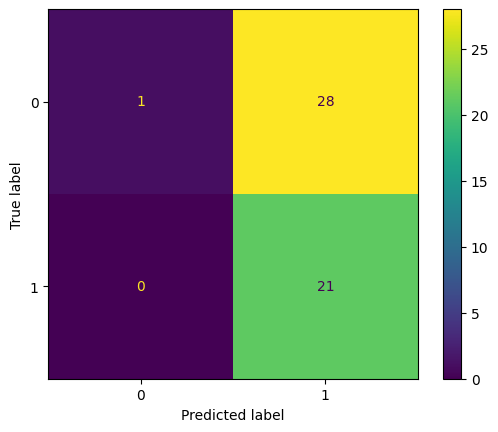

Accuracy: 0.44
Recall: [0.03448276 1.        ]
Precision: [1.         0.42857143]
F1: [0.06666667 0.6       ]


In [ ]:
y_test=df_beam_gpt["sentiment_conv"]
predicted=df_beam_gpt["sent_predicted_label_conv"]

cm=confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ["negative[0]", "Positive[1]"])

cm_display.plot()
plt.show()

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, predicted,average=None)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, predicted,average=None)
print("Precision:", precision)

f1 = f1_score(y_test, predicted,average=None)
print("F1:", f1)

In [ ]:
df_beam_gpt['text_del_stop_words']=df_beam_gpt['gen_text'].apply(del_stop_words)
docs = df_beam_gpt['text_del_stop_words']
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)

In [ ]:
topic_model.get_topics()

{-1: [('gut', 0.21295599427940798),
  ('hotel', 0.19452579462571654),
  ('sauber', 0.17467899034412585),
  ('freundlich', 0.17191148441124038),
  ('zimmer', 0.167701992766604),
  ('personal', 0.166282872570894),
  ('lage', 0.13921690184941615),
  ('frühstück', 0.12100091977135613),
  ('hilfsbereit', 0.1175244635861768),
  ('hotels', 0.06363715746230576)]}

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,30,-1_gut_hotel_sauber_freundlich,"[gut, hotel, sauber, freundlich, zimmer, perso...",[Hotel . Hotel gibt Klimaanlage . Zimmer groß ...
